<a href="https://colab.research.google.com/github/sruthi1996/DeepLearning/blob/master/p1ch2_intro_%26_pretrained_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
torch.version.__version__

'1.5.0+cu101'

In [0]:
a = torch.ones(4,4)
b = torch.ones(4,4)


In [4]:
a * b

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

"cuda" implies that the machine code is generated for the GPU

In [5]:
a = a.to('cuda')
b = b.to('cuda')
a + b

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]], device='cuda:0')

Working with pre trained models using torchvision

In [0]:
from torchvision import models

In [7]:
#to return the list of objects available in models
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [0]:
alexnet = models.AlexNet()

In [9]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth


In [10]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

working with images

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
'''download = drive.CreateFile({'id':"1uFe4KwMpX4YPnc2H4z4zxepF7RJxm65M"})
download.GetContentFile('seeds.csv')

In [13]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['puppy.jpg']))

Saving puppy.jpg to puppy.jpg


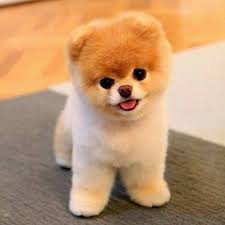

In [14]:
im

preprocessing the image

In [0]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

In [0]:
im_preprocess = preprocess(im)

In [17]:
im_preprocess

tensor([[[ 2.1119,  2.1119,  2.1975,  ...,  2.1290,  2.1290,  2.1290],
         [ 2.1290,  2.1119,  2.2147,  ...,  2.1462,  2.1462,  2.1462],
         [ 2.1119,  2.1119,  2.1462,  ...,  2.1804,  2.1804,  2.1804],
         ...,
         [-0.1143, -0.0629, -0.1314,  ..., -0.1657, -0.2171, -0.2684],
         [ 0.0056,  0.0227, -0.0116,  ..., -0.1143, -0.0972, -0.0801],
         [ 0.0227, -0.0287,  0.0227,  ..., -0.4226, -0.3198, -0.2171]],

        [[ 0.9580,  0.9580,  0.9405,  ...,  1.2731,  1.2731,  1.2731],
         [ 0.9930,  0.9755,  1.0105,  ...,  1.2556,  1.2556,  1.2556],
         [ 1.0280,  1.0280,  1.0280,  ...,  1.2206,  1.2206,  1.2206],
         ...,
         [-0.2325, -0.1800, -0.2675,  ..., -0.4076, -0.4601, -0.5126],
         [-0.1099, -0.0924, -0.1625,  ..., -0.3550, -0.3375, -0.3200],
         [-0.0924, -0.1450, -0.1099,  ..., -0.6702, -0.5651, -0.4601]],

        [[ 0.1302,  0.1302,  0.1999,  ...,  0.3045,  0.3045,  0.3045],
         [ 0.1999,  0.1825,  0.2696,  ...,  0

In [0]:
batch_t = torch.unsqueeze(im_preprocess, 0)

In [19]:
batch_t

tensor([[[[ 2.1119,  2.1119,  2.1975,  ...,  2.1290,  2.1290,  2.1290],
          [ 2.1290,  2.1119,  2.2147,  ...,  2.1462,  2.1462,  2.1462],
          [ 2.1119,  2.1119,  2.1462,  ...,  2.1804,  2.1804,  2.1804],
          ...,
          [-0.1143, -0.0629, -0.1314,  ..., -0.1657, -0.2171, -0.2684],
          [ 0.0056,  0.0227, -0.0116,  ..., -0.1143, -0.0972, -0.0801],
          [ 0.0227, -0.0287,  0.0227,  ..., -0.4226, -0.3198, -0.2171]],

         [[ 0.9580,  0.9580,  0.9405,  ...,  1.2731,  1.2731,  1.2731],
          [ 0.9930,  0.9755,  1.0105,  ...,  1.2556,  1.2556,  1.2556],
          [ 1.0280,  1.0280,  1.0280,  ...,  1.2206,  1.2206,  1.2206],
          ...,
          [-0.2325, -0.1800, -0.2675,  ..., -0.4076, -0.4601, -0.5126],
          [-0.1099, -0.0924, -0.1625,  ..., -0.3550, -0.3375, -0.3200],
          [-0.0924, -0.1450, -0.1099,  ..., -0.6702, -0.5651, -0.4601]],

         [[ 0.1302,  0.1302,  0.1999,  ...,  0.3045,  0.3045,  0.3045],
          [ 0.1999,  0.1825,  

In [20]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
out = resnet(batch_t)
out

tensor([[ 2.5157e+00,  3.5343e+00, -2.1260e+00, -2.0351e+00, -1.7588e+00,
          2.4125e+00, -3.5147e+00, -2.5592e+00, -2.3766e-01, -2.6915e+00,
          1.7376e+00, -2.1645e+00, -3.4390e+00, -2.7836e+00, -3.1754e+00,
         -2.3342e+00, -7.5453e-01, -1.4976e+00, -4.2154e+00, -3.0250e+00,
         -2.5213e+00, -1.8270e+00, -3.3382e+00, -3.0608e+00, -5.4653e+00,
         -8.4778e-01,  1.2978e+00,  3.0401e+00,  1.0337e+00,  2.4683e+00,
         -1.7568e+00, -1.1947e+00,  1.7971e+00, -5.2010e-01, -1.9980e-01,
          1.6760e-02,  1.4373e+00, -2.2152e+00,  3.2305e+00, -2.1012e+00,
         -5.5252e-01,  1.1410e+00,  3.9022e-01,  1.0915e+00, -6.2416e-01,
         -7.9137e-01, -1.7615e+00, -3.0769e-01, -2.5769e+00, -2.6001e+00,
         -2.6593e+00,  1.6680e+00,  3.1838e-01, -1.1479e+00, -2.6975e+00,
         -2.6740e+00, -4.7856e-02, -1.1809e+00, -1.0016e+00, -5.4368e-01,
         -1.0850e+00, -3.2566e+00, -5.9870e-02,  6.6884e-01, -1.0339e+00,
         -2.9962e-01,  5.2641e-01, -1.